In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [6]:
data=pd.read_csv("carprices1.csv")
data

,carModel,Mileage,SellPrice,age
0,BMW X5,69000,18000,6
1,BMW X5,60000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,4
4,BMW X5,46000,31500,4
5,Audi A5,59000,15000,5
6,Audi A5,52000,32000,5
7,Audi A5,54000,19300,6
8,Audi A5,91000,12000,5
9,Mercedez Benz C class,67000,20000,6


In [7]:
input=data.drop("SellPrice",axis="columns")
target=data["SellPrice"]

In [8]:
input

,carModel,Mileage,age
0,BMW X5,69000,6
1,BMW X5,60000,3
2,BMW X5,57000,5
3,BMW X5,22500,4
4,BMW X5,46000,4
5,Audi A5,59000,5
6,Audi A5,52000,5
7,Audi A5,54000,6
8,Audi A5,91000,5
9,Mercedez Benz C class,67000,6


In [9]:
target

0     18000
1     34000
2     26100
3     40000
4     31500
5     15000
6     32000
7     19300
8     12000
9     20000
10    20000
11    21000
12    33000
Name: SellPrice, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le_carModel=LabelEncoder()
le_age=LabelEncoder()
le_Mileage=LabelEncoder()


In [12]:
input["carModel_n"]=le_carModel.fit_transform(input["carModel"])
input["age_n"]=le_carModel.fit_transform(input["age"])
input["Mileage_n"]=le_carModel.fit_transform(input["Mileage"])

In [13]:
input

,carModel,Mileage,age,carModel_n,age_n,Mileage_n
0,BMW X5,69000,6,1,3,8
1,BMW X5,60000,3,1,0,6
2,BMW X5,57000,5,1,2,4
3,BMW X5,22500,4,1,1,0
4,BMW X5,46000,4,1,1,1
5,Audi A5,59000,5,0,2,5
6,Audi A5,52000,5,0,2,2
7,Audi A5,54000,6,0,3,3
8,Audi A5,91000,5,0,2,11
9,Mercedez Benz C class,67000,6,2,3,7


In [14]:
input_n=input.drop(["carModel","Mileage","age"],axis="columns")
input_n

,carModel_n,age_n,Mileage_n
0,1,3,8
1,1,0,6
2,1,2,4
3,1,1,0
4,1,1,1
5,0,2,5
6,0,2,2
7,0,3,3
8,0,2,11
9,2,3,7


In [15]:
from sklearn import tree
from sklearn.datasets import load_iris


In [16]:
model=tree.DecisionTreeClassifier()

In [17]:
model.fit(input_n,target)

DecisionTreeClassifier()

In [18]:
model.score(input_n,target)

1.0

In [19]:
model.predict([[2,4,6]])

array([20000], dtype=int64)

In [20]:
import matplotlib.pyplot as plt


[Text(864.9, 757.1571428571428, 'X[0] <= 1.5\ngini = 0.911\nsamples = 13\nvalue = [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]'),
 Text(502.2, 640.6714285714286, 'X[1] <= 0.5\ngini = 0.889\nsamples = 9\nvalue = [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1]'),
 Text(390.59999999999997, 524.1857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]'),
 Text(613.8, 524.1857142857143, 'X[0] <= 0.5\ngini = 0.875\nsamples = 8\nvalue = [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1]'),
 Text(334.79999999999995, 407.7, 'X[1] <= 2.5\ngini = 0.75\nsamples = 4\nvalue = [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]'),
 Text(223.2, 291.21428571428567, 'X[2] <= 3.5\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]'),
 Text(111.6, 174.7285714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]'),
 Text(334.79999999999995, 174.7285714285714, 'X[2] <= 8.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(223.2, 58.24285714285713, 'gin

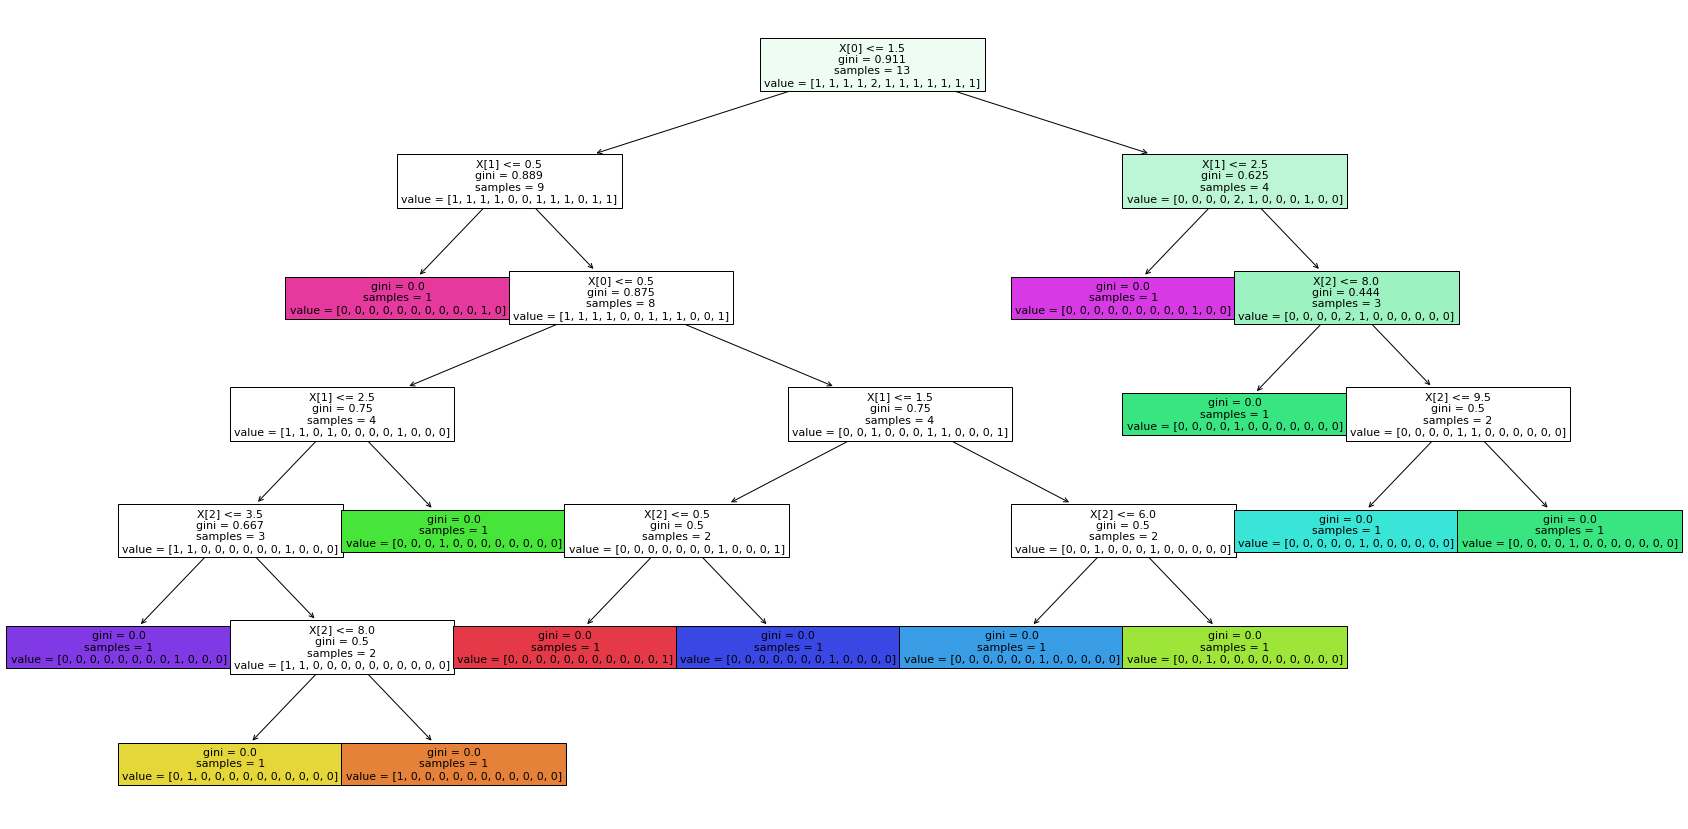

In [23]:
plt.figure(figsize=(30,15))
tree.plot_tree(model,filled=True)